<a href="https://www.kaggle.com/lagartoxa/titanic-competition-decision-tree?scriptVersionId=89540048" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [64]:
# Loading data

train_df = pd.read_csv("/kaggle/input/titanic/train.csv", index_col="PassengerId")
train_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
# Loading test data

test_df = pd.read_csv("/kaggle/input/titanic/test.csv", index_col="PassengerId")
test_df.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [66]:
# Converting string data into integer

train_data = train_df.copy()
test_data = test_df.copy()

# IMHO the following columns won't be needed
train_data.pop("Name")
train_data.pop("Ticket")

test_data.pop("Name")
test_data.pop("Ticket")

train_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

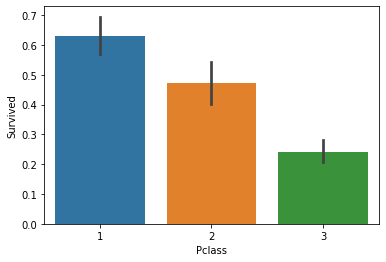

In [67]:
# Analysing the data

import seaborn as sns


# Let's check if the ticket class is related with the survival
sns.barplot(x="Pclass", y="Survived", data=train_data)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

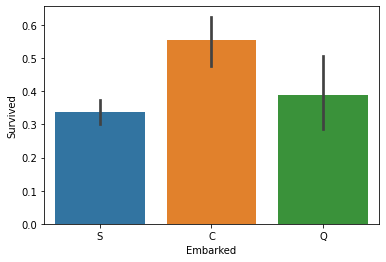

In [68]:
# And now the Embarked feature
sns.barplot(x="Embarked", y="Survived", data=train_data)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

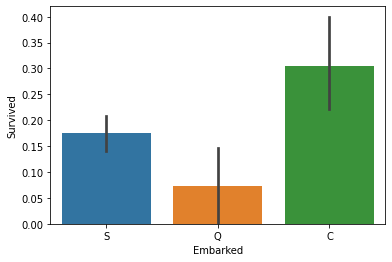

In [69]:
# Maybe people who embarked on 'S' could have a higher chance to die, but it is unlikely.
# Maybe sex and embarked could be related with the survival chance?

# Male
male_data = train_data.loc[train_data["Sex"] == "male"]
sns.barplot(x="Embarked", y="Survived", data=male_data)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

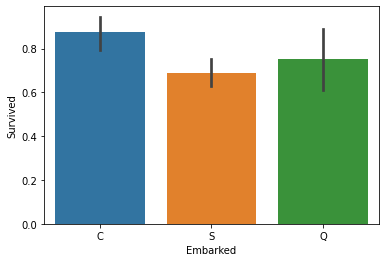

In [70]:
# Female
female_data = train_data.loc[train_data["Sex"] == "female"]
sns.barplot(x="Embarked", y="Survived", data=female_data)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

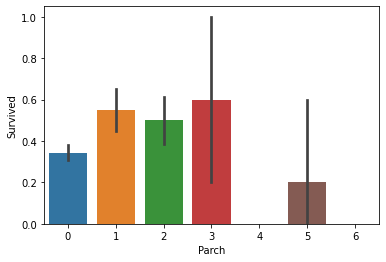

In [71]:
# C gave better survival chances than the others for both man and women, and more than 50%
# of people from 'C' survived (S: ~35%, Q: ~40%), so I'll leave this variable.
# Let's do the same for Parch and SibSp

sns.barplot(x="Parch", y="Survived", data=train_data)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

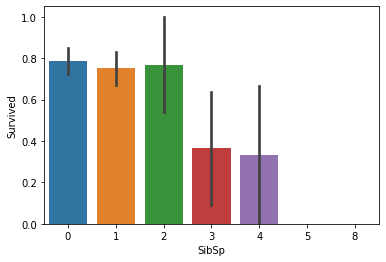

In [72]:
# It looks like who had 1-3 parents/children (Parch), had more survival chances
sns.barplot(x="SibSp", y="Survived", data=female_data)

In [73]:
# And it looks like who had 0-2 siblings/spouses (SibSp), had more survival chances as well
# Let's check for NA data

train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [74]:
# Holy, too many missing cabins! Let's remove it

train_data.pop("Cabin")
test_data.pop("Cabin")

PassengerId
892      NaN
893      NaN
894      NaN
895      NaN
896      NaN
        ... 
1305     NaN
1306    C105
1307     NaN
1308     NaN
1309     NaN
Name: Cabin, Length: 418, dtype: object

In [75]:
# Processing the data. We have to replace the string values from the Sex feature
# with numbers and also fill the NaN values from the Age feature. Also since there are
# only 2 missing values for the Embarked, I'm gonna remove those rows

sex = {"male": 1, "female": 0, }
train_data["Sex"] = train_data["Sex"].map(sex)
test_data["Sex"] = test_data["Sex"].map(sex)

In [76]:
train_data = train_data.dropna(subset=["Embarked", ])

train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [77]:
# Replacing the Embarked strings with numbers

embarked = {'S': 2, 'Q': 1, 'C': 0, }
train_data["Embarked"] = train_data["Embarked"].map(embarked)
test_data["Embarked"] = test_data["Embarked"].map(embarked)

train_data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2


In [78]:
# Separating x and y
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", ]
target = "Survived"

x = train_data[features]
y = train_data[target]

# Spliting train data into train and validation data
size = len(train_data)
chunks = 5
split = int(size/chunks)

x_train = x[split:]
y_train = y[split:]
x_validation = x[:split]
y_validation = y[:split]

print(f"Split size will be {split}")

Split size will be 177


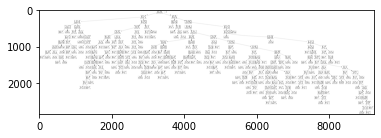

In [79]:
# Let's try to replace the NaN values with the mean of the column
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

import pydotplus

from sklearn import tree
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier


mean_inputer = SimpleImputer(missing_values=np.nan, strategy="mean")
mean_inputer.fit(x_train)
mean_x_train = mean_inputer.transform(x_train)
mean_x_validation = mean_inputer.transform(x_validation)

model = DecisionTreeClassifier()
fit = model.fit(mean_x_train, y_train)

# Now let's see our tree
data = tree.export_graphviz(fit, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png("./decision_tree_01.png")

img = pltimg.imread("./decision_tree_01.png")
img_plot = plt.imshow(img)
plt.show()

# Interpretation
# The image kinda sucks but by doing a quick look, it is doing what we
# expected, since the sex is the main factor of the tree and the others
# are related with wealthy. Let's continue it...

In [80]:
# Accuracy, sensitivity, specificity and ROC curve

from sklearn import metrics


y_predict = model.predict(mean_x_validation)

accuracy = metrics.accuracy_score(y_validation, y_predict)
sensitivity = metrics.recall_score(y_validation, y_predict, pos_label=1)
specificity = metrics.recall_score(y_validation, y_predict, pos_label=0)
roc_area = metrics.roc_auc_score(y_validation, y_predict)

print(
    f"Model replacing the NaN values with the mean:\n"
    f" - Accuracy: {accuracy}\n"
    f" - Sensitivity: {sensitivity}\n"
    f" - Specificity: {specificity}\n"
    f" - ROC Curve Area: {roc_area}"
)



Model replacing the NaN values with the mean:
 - Accuracy: 0.7570621468926554
 - Sensitivity: 0.6896551724137931
 - Specificity: 0.7899159663865546
 - ROC Curve Area: 0.7397855694001738


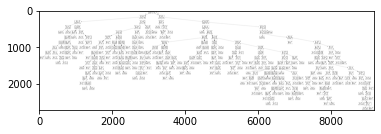

Model replacing the NaN values with the mean for k=0:
 - Accuracy: 0.7457627118644068
 - Sensitivity: 0.6724137931034483
 - Specificity: 0.7815126050420168
 - ROC Curve Area: 0.7269631990727327


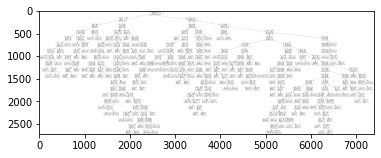

Model replacing the NaN values with the mean for k=1:
 - Accuracy: 0.7853107344632768
 - Sensitivity: 0.7051282051282052
 - Specificity: 0.8484848484848485
 - ROC Curve Area: 0.776806526806527


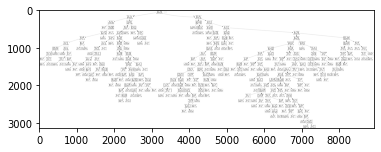

Model replacing the NaN values with the mean for k=2:
 - Accuracy: 0.8022598870056498
 - Sensitivity: 0.7246376811594203
 - Specificity: 0.8518518518518519
 - ROC Curve Area: 0.7882447665056361


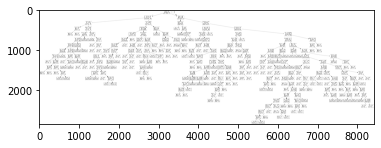

Model replacing the NaN values with the mean for k=3:
 - Accuracy: 0.7457627118644068
 - Sensitivity: 0.6285714285714286
 - Specificity: 0.822429906542056
 - ROC Curve Area: 0.7255006675567423


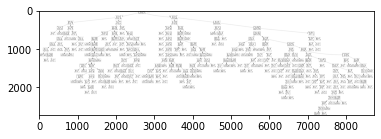

Model replacing the NaN values with the mean for k=4:
 - Accuracy: 0.8305084745762712
 - Sensitivity: 0.8253968253968254
 - Specificity: 0.8333333333333334
 - ROC Curve Area: 0.8293650793650793


In [81]:
# Let's play with a k-fold of the previous model, where k=4

for i in range(chunks):
    # Each iteration will get the data we want to train
    # and the data we want to use to valid. On the first loop
    # we'll use x[:222] to valid the model, on the
    # second we'll use x[222:444], x[444:666] on the third
    # and x[666: 888] on the last one.
    x_fold_train = pd.concat([x[:i*split], x[(i+1)*split:]])
    y_fold_train = pd.concat([y[:i*split], y[(i+1)*split:]])

    x_fold_validation = x[i*split: (i+1)*split]
    y_fold_validation = y[i*split: (i+1)*split]
    
    # Re-creating the imputer to use the mean for NaN values
    mean_fold_inputer = SimpleImputer(missing_values=np.nan, strategy="mean")
    mean_fold_inputer.fit(x_fold_train)
    mean_x_fold_train = mean_fold_inputer.transform(x_fold_train)
    mean_x_fold_validation = mean_fold_inputer.transform(x_fold_validation)
    mean_x_fold_test = mean_fold_inputer.transform(test_data)

    model_fold = DecisionTreeClassifier()
    fit_fold = model_fold.fit(mean_x_fold_train, y_fold_train)

    # Now, let's see our tree
    data = tree.export_graphviz(fit_fold, out_file=None, feature_names=features)
    graph = pydotplus.graph_from_dot_data(data)
    graph.write_png(f"./decision_tree_k-fold_{i}.png")

    img = pltimg.imread(f"./decision_tree_k-fold_{i}.png")
    img_plot = plt.imshow(img)
    plt.show()
    
    # Getting the metrics
    y_fold_predict = model_fold.predict(mean_x_fold_validation)

    accuracy_fold = metrics.accuracy_score(y_fold_validation, y_fold_predict)
    sensitivity_fold = metrics.recall_score(y_fold_validation, y_fold_predict, pos_label=1)
    specificity_fold = metrics.recall_score(y_fold_validation, y_fold_predict, pos_label=0)
    roc_area_fold = metrics.roc_auc_score(y_fold_validation, y_fold_predict)
    
    print(
        f"Model replacing the NaN values with the mean for k={i}:\n"
        f" - Accuracy: {accuracy_fold}\n"
        f" - Sensitivity: {sensitivity_fold}\n"
        f" - Specificity: {specificity_fold}\n"
        f" - ROC Curve Area: {roc_area_fold}"
    )
    
    # And finally, let's generate the outputs for the competition :D
    y_fold_predict = model_fold.predict(mean_x_fold_test)
    output = pd.DataFrame(
        {
            "PassengerId": test_data.index,
            "Survived": y_fold_predict,
        }
    )

    output.to_csv(f"submission_decision_tree_k-fold_{i}.csv", index=False)